In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def show(f):
    plt.axis("off")
    im = cv2.imread("raw-data/" + f + ".png")
    # Seperate red layer
    plt.imshow(im[:, :, 2])
    plt.show()

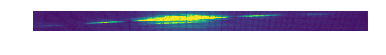

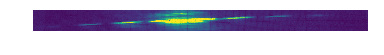

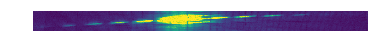

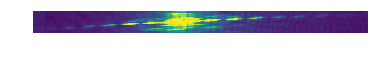

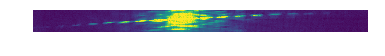

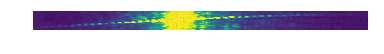

In [3]:
for i in (40, 50, 100, 120, 280, 400):
    show("slits/" + str(i))


In [4]:
im = cv2.imread('raw-data/slits/50.png')
# cv2 reads image in B-G-R format
# So we extract the last layer for the pattern of red laser
im_r = im[:, :, 2]

# x is horizontal, y is vertical
y_dim, x_dim = im_r.shape

In [5]:
# Find the two points on the left and right edges of the image
# that maximises the sum of the intensity of the pixels that are
# on the line between these 2 points -- this should be the line
# parallel to the diffraction pattern

# Maximum intensity; originally set to -1 and is optimised after
i_max = -1
# Optimal line: y = a * x + b
(a, b) = None, None

# Progress bar
from tqdm import trange
for y_left in trange(y_dim):
    for y_right in range(y_dim):
        # Find line y = m * x + k
        m = (y_right - y_left) / x_dim
        k = y_left
        
        # Sum of intensities on this line
        i_sum = 0
        
        for x in range(x_dim):
            y = int(round(m * x + k))
            i_sum += im_r[y, x]
        
        # Update recording of optimal match
        if i_max < i_sum:
            i_max = i_sum
            (a, b) = (m, k)

a, b

100%|██████████| 247/247 [03:14<00:00,  1.25it/s]


(-0.042162698412698416, 196)

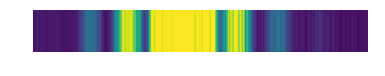

In [6]:
pattern = []

for x in range(x_dim):
    y = int(round(a * x + b))
    pattern.append(im_r[y, x])

plt.axis("off")
plt.imshow(np.array([pattern] * 500))
plt.show()